## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Import and Recognize The Data

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,birth_date,gender,bmi,child,smoking,region,insurance_price
0,2002,female,27.9,0,yes,southwest,16884.92
1,2003,male,33.8,1,no,southeast,1725.55
2,1993,male,33.0,3,no,southeast,4449.46
3,1988,male,22.7,0,no,northwest,21984.47
4,1989,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,1971,male,31.0,3,no,northwest,10600.55
1334,2003,female,31.9,0,no,northeast,2205.98
1335,2003,female,36.9,0,no,southeast,1629.83
1336,2000,female,25.8,0,no,southwest,2007.95


In [4]:
df.head()

,birth_date,gender,bmi,child,smoking,region,insurance_price
0,2002,female,27.9,0,yes,southwest,16884.92
1,2003,male,33.8,1,no,southeast,1725.55
2,1993,male,33.0,3,no,southeast,4449.46
3,1988,male,22.7,0,no,northwest,21984.47
4,1989,male,28.9,0,no,northwest,3866.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   birth_date       1338 non-null   int64  
 1   gender           1337 non-null   object 
 2   bmi              1336 non-null   float64
 3   child            1338 non-null   int64  
 4   smoking          1338 non-null   object 
 5   region           1338 non-null   object 
 6   insurance_price  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,birth_date,bmi,child,insurance_price
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,1981.792975,30.680539,1.094918,13270.422414
std,14.049960,6.089223,1.205493,12110.011240
min,1957.000000,16.000000,0.000000,1121.870000
25%,1970.000000,26.300000,0.000000,4740.287500
50%,1982.000000,30.400000,1.000000,9382.030000
75%,1994.000000,34.700000,2.000000,16639.915000
max,2003.000000,53.100000,5.000000,63770.430000


In [7]:
df[['gender', 'smoking', 'region']].describe()

,gender,smoking,region
count,1337,1338,1338
unique,2,2,4
top,male,no,southeast
freq,675,1064,364


In [8]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
df.nunique()

birth_date           47
gender                2
bmi                 275
child                 6
smoking               2
region                4
insurance_price    1337
dtype: int64

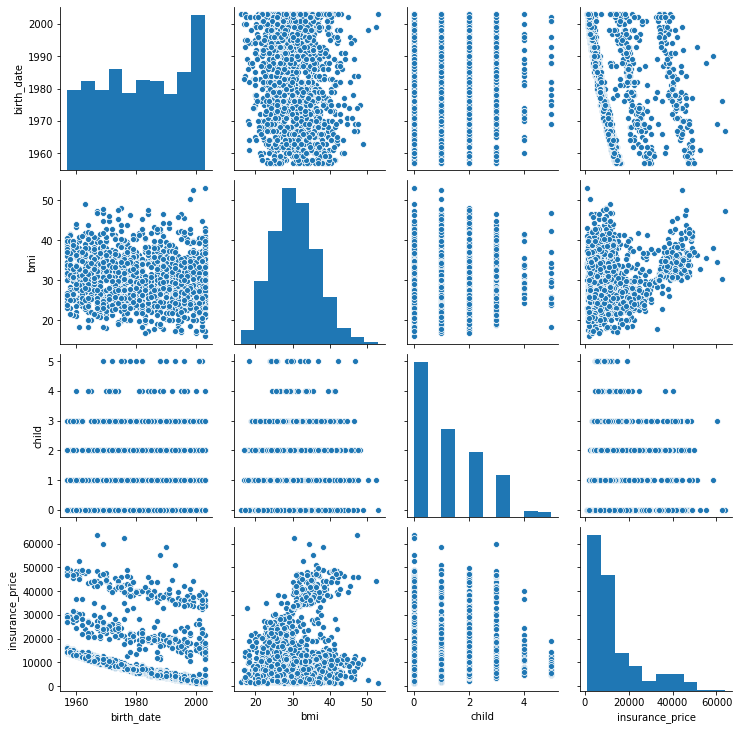

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,birth_date,bmi,child,insurance_price
birth_date,1.000000,-0.106835,-0.042469,-0.299008
bmi,-0.106835,1.000000,0.011780,0.196964
child,-0.042469,0.011780,1.000000,0.067998
insurance_price,-0.299008,0.196964,0.067998,1.000000


<AxesSubplot:>

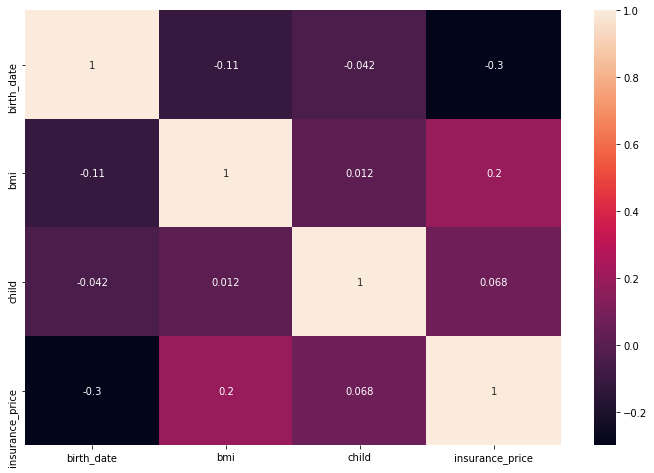

In [12]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)

## Feature Engineering

In [13]:
from datetime import date

In [14]:
date.today()

datetime.date(2021, 3, 14)

In [15]:
date.today().year

2021

In [16]:
2021 - df['birth_date']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: birth_date, Length: 1338, dtype: int64

In [17]:
date.today().year - df['birth_date']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: birth_date, Length: 1338, dtype: int64

In [18]:
df['birth_date'] = date.today().year - df['birth_date']

In [19]:
df.rename({'birth_date' : 'age'}, axis = 1, inplace = True)

In [20]:
df

,age,gender,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<AxesSubplot:>

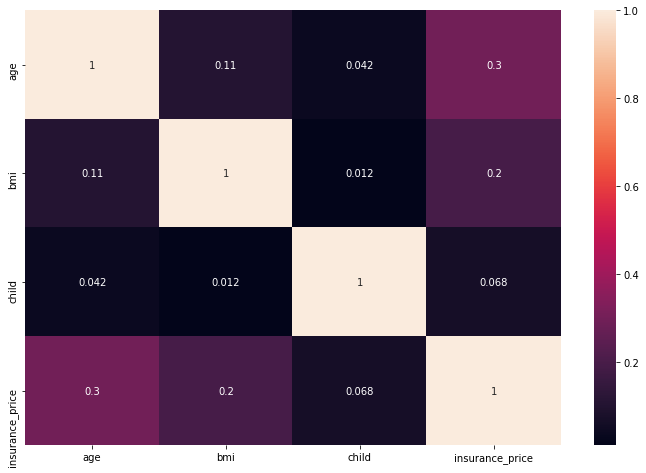

In [21]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)

## Missing Values

In [22]:
df.isnull()

,age,gender,bmi,child,smoking,region,insurance_price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

age                0
gender             1
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [24]:
df['gender'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: gender, Length: 1338, dtype: bool

In [25]:
df[df['gender'].isnull()]

,age,gender,bmi,child,smoking,region,insurance_price
73,58,NaN,32.0,1,no,southeast,11946.63


In [26]:
df[df['gender'].isnull()].index

Int64Index([73], dtype='int64')

In [27]:
df.drop(index = df[df['gender'].isnull()].index)

,age,gender,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [28]:
df.drop(index = df[df['gender'].isnull()].index, inplace = True)

In [29]:
df.isnull().sum()

age                0
gender             0
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [30]:
df[df['bmi'].isnull()]

,age,gender,bmi,child,smoking,region,insurance_price
17,23,male,NaN,0,no,northeast,2395.17
28,23,male,NaN,1,no,northwest,2775.19


In [31]:
df['bmi']

0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1337, dtype: float64

<AxesSubplot:ylabel='Frequency'>

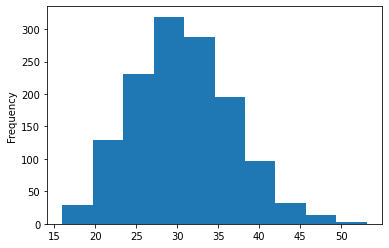

In [32]:
df['bmi'].plot(kind = 'hist')

<AxesSubplot:>

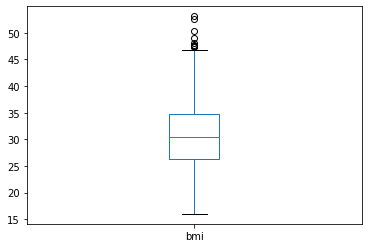

In [33]:
df['bmi'].plot(kind = 'box')

<AxesSubplot:xlabel='bmi'>

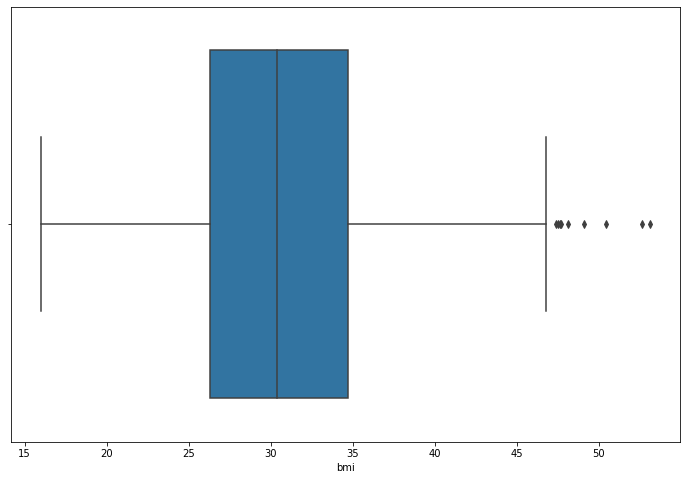

In [34]:
plt.figure(figsize = (12, 8))
sns.boxplot(df['bmi'])

In [35]:
[(df['age'] == 23) & (df['gender'] == 'male')]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1333    False
 1334    False
 1335    False
 1336    False
 1337    False
 Length: 1337, dtype: bool]

In [36]:
df[(df['age'] == 23) & (df['gender'] == 'male')]

,age,gender,bmi,child,smoking,region,insurance_price
12,23,male,34.4,0,no,southwest,1826.84
17,23,male,NaN,0,no,northeast,2395.17
28,23,male,NaN,1,no,northwest,2775.19
358,23,male,41.9,0,no,southeast,1837.28
479,23,male,32.6,0,no,southeast,1824.29
738,23,male,31.7,3,yes,northeast,36189.10
761,23,male,35.2,1,no,southwest,2416.96
804,23,male,26.5,0,no,southeast,1815.88
817,23,male,37.1,3,no,southwest,3597.60
847,23,male,50.4,1,no,southeast,2438.06


<AxesSubplot:ylabel='Frequency'>

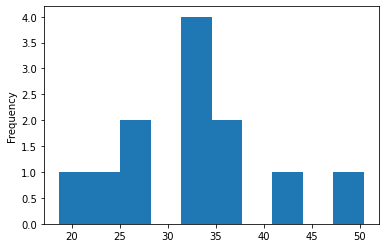

In [37]:
df[(df['age'] == 23) & (df['gender'] == 'male')]['bmi'].plot(kind = 'hist')

In [38]:
df['bmi'].mean()

30.679550561797758

In [39]:
df[(df['age'] == 23) & (df['gender'] == 'male')]['bmi'].mean()

32.75833333333333

In [40]:
df['bmi'].fillna(method='ffill').head(20)

0     27.9
1     33.8
2     33.0
3     22.7
4     28.9
5     25.7
6     33.4
7     27.7
8     29.8
9     25.8
10    26.2
11    26.3
12    34.4
13    39.8
14    42.1
15    24.6
16    30.8
17    30.8
18    40.3
19    35.3
Name: bmi, dtype: float64

In [41]:
df['bmi'].head(20)

0     27.9
1     33.8
2     33.0
3     22.7
4     28.9
5     25.7
6     33.4
7     27.7
8     29.8
9     25.8
10    26.2
11    26.3
12    34.4
13    39.8
14    42.1
15    24.6
16    30.8
17     NaN
18    40.3
19    35.3
Name: bmi, dtype: float64

In [42]:
df['bmi'].fillna(value = df['bmi'].mean(), inplace = True)

In [43]:
df.isnull().sum()

age                0
gender             0
bmi                0
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1337 non-null   int64  
 1   gender           1337 non-null   object 
 2   bmi              1337 non-null   float64
 3   child            1337 non-null   int64  
 4   smoking          1337 non-null   object 
 5   region           1337 non-null   object 
 6   insurance_price  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Outliers

<AxesSubplot:>

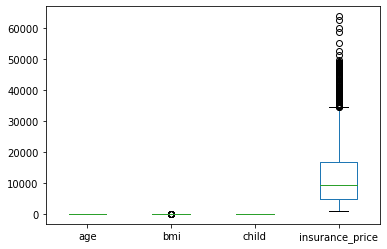

In [45]:
df.plot(kind = 'box')

<AxesSubplot:>

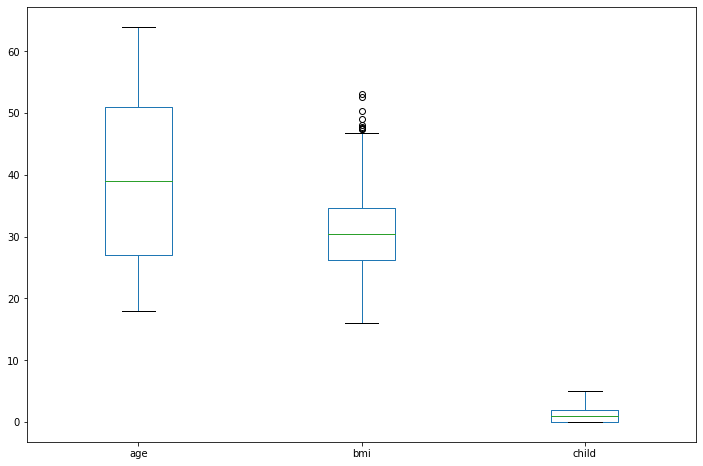

In [46]:
df.drop('insurance_price', axis = 1).plot(kind = 'box', figsize = (12, 8))

<AxesSubplot:xlabel='bmi'>

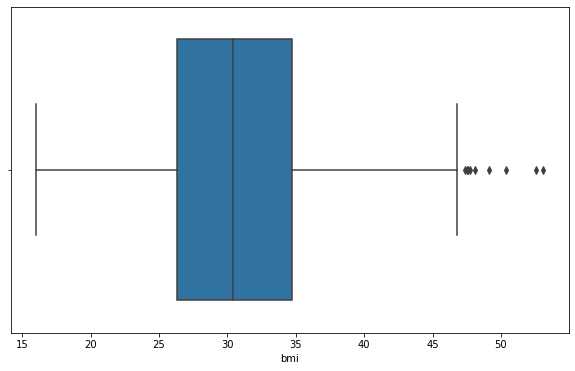

In [47]:
plt.figure(figsize = (10, 6))
sns.boxplot(df['bmi'])

In [48]:
df[['bmi']].describe()

,bmi
count,1337.000000
mean,30.679551
std,6.086836
min,16.000000
25%,26.300000
50%,30.400000
75%,34.700000
max,53.100000


In [49]:
df['bmi'].sort_values()

172     16.0
1226    16.8
428     16.8
412     17.2
250     17.3
        ... 
286     48.1
116     49.1
847     50.4
1047    52.6
1317    53.1
Name: bmi, Length: 1337, dtype: float64

In [50]:
df['bmi'].quantile(0.75)

34.7

In [51]:
df['bmi'].quantile(0.25)

26.3

In [52]:
iqr = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)

In [53]:
iqr

8.400000000000002

In [54]:
upper_bound = df['bmi'].quantile(0.75) + (1.5 * iqr)

In [55]:
upper_bound

47.300000000000004

In [56]:
df[df['bmi'] > upper_bound]

,age,gender,bmi,child,smoking,region,insurance_price
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [57]:
df[(df['bmi'] > 50)]

,age,gender,bmi,child,smoking,region,insurance_price
847,23,male,50.4,1,no,southeast,2438.06
1047,22,male,52.6,1,yes,southeast,44501.40
1317,18,male,53.1,0,no,southeast,1163.46


In [58]:
df[(df['bmi'] > 50) & (df['smoking'] == 'no')]

,age,gender,bmi,child,smoking,region,insurance_price
847,23,male,50.4,1,no,southeast,2438.06
1317,18,male,53.1,0,no,southeast,1163.46


In [59]:
df[(df['bmi'] > 50) & (df['smoking'] == 'no')].index

Int64Index([847, 1317], dtype='int64')

In [60]:
df.drop(index = df[(df['bmi'] > 50) & (df['smoking'] == 'no')].index, inplace = True)

In [61]:
df[df['bmi'] > upper_bound]

,age,gender,bmi,child,smoking,region,insurance_price
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91


In [62]:
df.loc[1318] # 1317

age                       35
gender                  male
bmi                     39.7
child                      4
smoking                   no
region             northeast
insurance_price      19496.7
Name: 1318, dtype: object

In [63]:
df.reset_index()

,index,age,gender,bmi,child,smoking,region,insurance_price
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1330,1333,50,male,31.0,3,no,northwest,10600.55
1331,1334,18,female,31.9,0,no,northeast,2205.98
1332,1335,18,female,36.9,0,no,southeast,1629.83
1333,1336,21,female,25.8,0,no,southwest,2007.95


In [64]:
df = df.reset_index(drop = True)

In [65]:
df.loc[1317]

age                       31
gender                  male
bmi                     31.1
child                      3
smoking                   no
region             northwest
insurance_price      5425.02
Name: 1317, dtype: object

In [66]:
from scipy.stats.mstats import winsorize

In [67]:
df['bmi'].quantile(0.99)

46.03200000000002

In [68]:
winsorize(df['bmi'], (0, 0.99))

masked_array(data=[18., 18., 18., ..., 18., 18., 18.],
             mask=False,
       fill_value=1e+20)

In [69]:
pd.Series(winsorize(df['bmi'], (0, 0.01)))

0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1330    31.0
1331    31.9
1332    36.9
1333    25.8
1334    29.1
Length: 1335, dtype: float64

<AxesSubplot:>

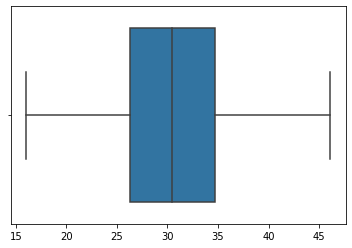

In [70]:
sns.boxplot(pd.Series(winsorize(df['bmi'], (0, 0.01))))

In [71]:
df['bmi'] = pd.Series(winsorize(df['bmi'], (0, 0.01)))

In [72]:
df

,age,gender,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1330,50,male,31.0,3,no,northwest,10600.55
1331,18,female,31.9,0,no,northeast,2205.98
1332,18,female,36.9,0,no,southeast,1629.83
1333,21,female,25.8,0,no,southwest,2007.95


<AxesSubplot:>

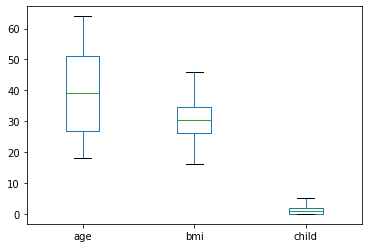

In [73]:
df.drop('insurance_price', axis = 1).plot(kind = 'box')

## Visualization

In [74]:
df.groupby('smoking').mean()

,age,bmi,child,insurance_price
smoking,,,,
no,39.403393,30.621262,1.091423,8443.462281
yes,38.514599,30.678832,1.113139,32050.231971


In [75]:
df.groupby('gender').mean()

,age,bmi,child,insurance_price
gender,,,,
female,39.503021,30.370393,1.074018,12569.578897
male,38.943536,30.891470,1.117385,13995.863016


In [76]:
df.groupby('region').mean()

,age,bmi,child,insurance_price
region,,,,
northeast,39.268519,29.191295,1.046296,13406.384691
northwest,39.196923,29.242706,1.147692,12417.575169
southeast,38.988920,33.217452,1.052632,14814.796814
southwest,39.455385,30.590154,1.141538,12346.937908


In [77]:
df.groupby('smoking').describe()

age                                                         bmi  \
          count       mean        std   min   25%   50%   75%   max   count   
smoking                                                                       
no       1061.0  39.403393  14.067403  18.0  27.0  40.0  52.0  64.0  1061.0   
yes       274.0  38.514599  13.923186  18.0  27.0  38.0  49.0  64.0   274.0   

                    ... child      insurance_price                \
              mean  ...   75%  max           count          mean   
smoking             ...                                            
no       30.621262  ...   2.0  5.0          1061.0   8443.462281   
yes      30.678832  ...   2.0  5.0           274.0  32050.231971   

                                                                           
                  std       min        25%       50%        75%       max  
smoking                                                                    
no        5994.295688   1121.87   3989.840   7345.73  11362.760  36910.61  
yes      11541.547338  12829.46  20826.245  34456.35  41019.205  63770.43  

[2 rows x 32 columns]

In [78]:
df.groupby('smoking').describe().T

smoking                          no           yes
age             count   1061.000000    274.000000
                mean      39.403393     38.514599
                std       14.067403     13.923186
                min       18.000000     18.000000
                25%       27.000000     27.000000
                50%       40.000000     38.000000
                75%       52.000000     49.000000
                max       64.000000     64.000000
bmi             count   1061.000000    274.000000
                mean      30.621262     30.678832
                std        5.936209      6.222780
                min       16.000000     17.200000
                25%       26.300000     26.100000
                50%       30.400000     30.450000
                75%       34.400000     35.200000
                max       46.100000     46.100000
child           count   1061.000000    274.000000
                mean       1.091423      1.113139
                std        1.219392      1.157066
                min        0.000000      0.000000
                25%        0.000000      0.000000
                50%        1.000000      1.000000
                75%        2.000000      2.000000
                max        5.000000      5.000000
insurance_price count   1061.000000    274.000000
                mean    8443.462281  32050.231971
                std     5994.295688  11541.547338
                min     1121.870000  12829.460000
                25%     3989.840000  20826.245000
                50%     7345.730000  34456.350000
                75%    11362.760000  41019.205000
                max    36910.610000  63770.430000

<AxesSubplot:xlabel='insurance_price', ylabel='region'>

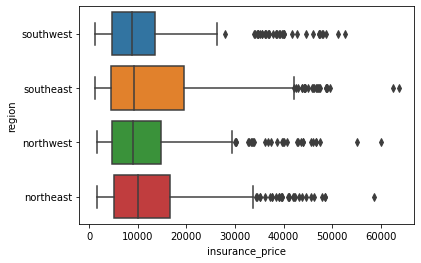

In [79]:
sns.boxplot(x = 'insurance_price', y = 'region', data = df)

<AxesSubplot:xlabel='insurance_price', ylabel='gender'>

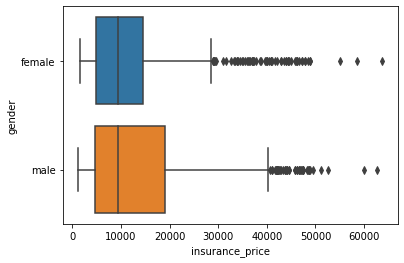

In [80]:
sns.boxplot(x = 'insurance_price', y = 'gender', data = df)

<AxesSubplot:xlabel='insurance_price', ylabel='smoking'>

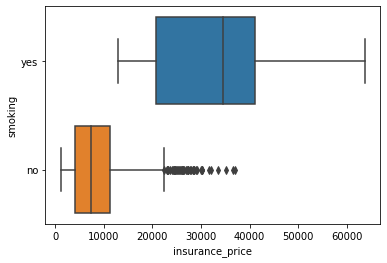

In [81]:
sns.boxplot(x = 'insurance_price', y = 'smoking', data = df)

<AxesSubplot:xlabel='age', ylabel='insurance_price'>

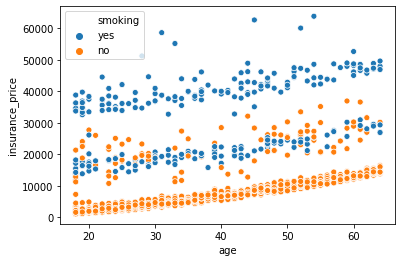

In [82]:
sns.scatterplot('age', 'insurance_price', data = df, hue = 'smoking')

<AxesSubplot:xlabel='bmi', ylabel='insurance_price'>

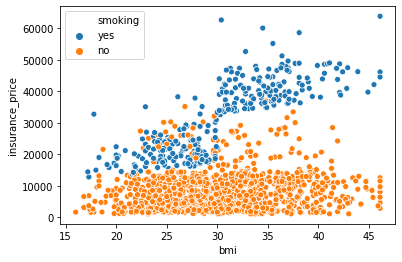

In [83]:
sns.scatterplot('bmi', 'insurance_price', data = df, hue = 'smoking')

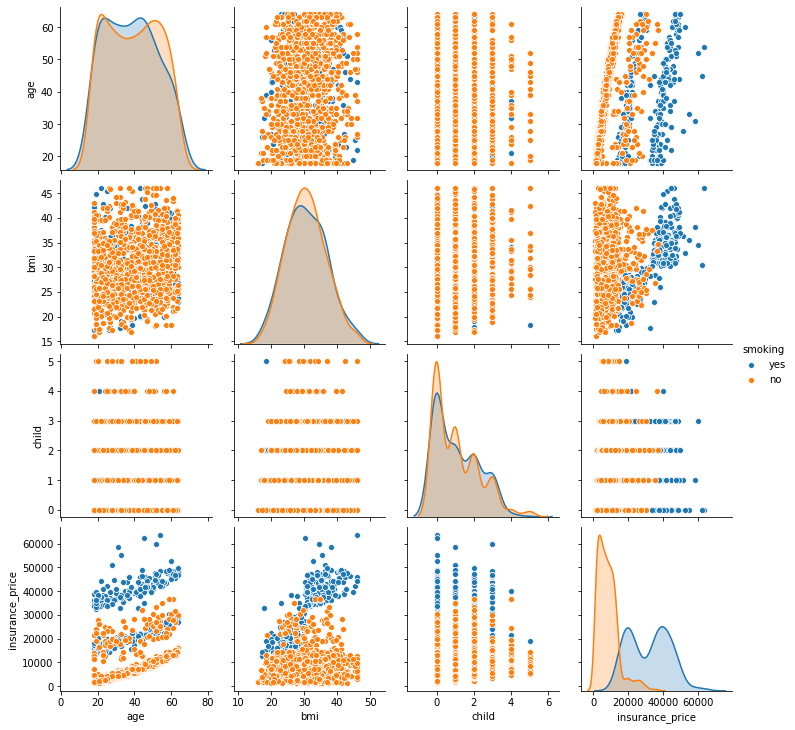

In [84]:
sns.pairplot(df, hue = 'smoking')

In [85]:
df[(df['smoking'] == 'yes') & (df['bmi'] < 30)]['insurance_price'].describe()

count      129.000000
mean     21363.216822
std       5066.780222
min      12829.460000
25%      17663.140000
50%      20167.340000
75%      24106.910000
max      38245.590000
Name: insurance_price, dtype: float64

In [86]:
df[(df['smoking'] == 'yes') & (df['bmi'] > 30)]['insurance_price'].describe()

count      143.000000
mean     41751.447622
std       5806.871441
min      32548.340000
25%      37367.745000
50%      40932.430000
75%      45706.115000
max      63770.430000
Name: insurance_price, dtype: float64

In [87]:
pd.cut(x=df['bmi'], bins=[0,18.5,24.9,29.9,99],
                       labels = ['Underweight', 'Normal','Overweight', 'Obese'])

0       Overweight
1            Obese
2            Obese
3           Normal
4       Overweight
           ...    
1330         Obese
1331         Obese
1332         Obese
1333    Overweight
1334    Overweight
Name: bmi, Length: 1335, dtype: category
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [88]:
df.groupby(pd.cut(x=df['bmi'], bins=[0,18.5,24.9,29.9,99],
                       labels = ['Underweight', 'Normal','Overweight', 'Obese'])).mean()

,age,bmi,child,insurance_price
bmi,,,,
Underweight,32.850000,17.630000,1.050000,8951.743000
Normal,36.827273,22.600455,1.122727,10441.308000
Overweight,38.897172,27.581491,1.064267,11000.079306
Obese,40.325779,35.185919,1.106232,15559.665113


In [89]:
def fill_value(df):
    if (df['smoking'] == 'yes') & (df['bmi'] > 30):
        return 'smoking and obese'
    if (df['smoking'] == 'yes') & (df['bmi'] < 30):
        return 'smoking and normal'
    return 'standard'

In [90]:
df['segments'] = df.apply(fill_value, axis = 1)

<AxesSubplot:xlabel='age', ylabel='insurance_price'>

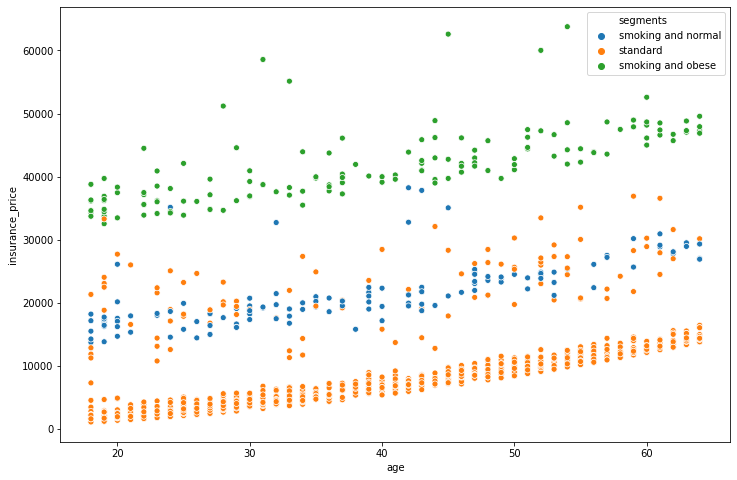

In [91]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'age', y = 'insurance_price', data = df, hue = 'segments')

In [92]:
# fig = plt.figure(figsize = (12, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(df['bmi'], df['age'], df['insurance_price'], c = df['smoking'].eq('yes').astype(int), marker='o')
# ax.set_xlabel('bmi')
# ax.set_ylabel('age')
# ax.set_zlabel('price')


<AxesSubplot:xlabel='region', ylabel='count'>

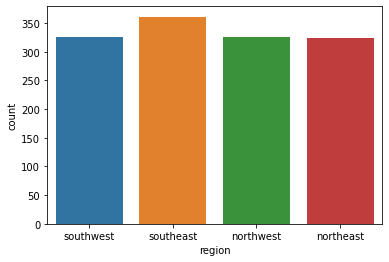

In [93]:
sns.countplot(df['region'])

<AxesSubplot:xlabel='insurance_price'>

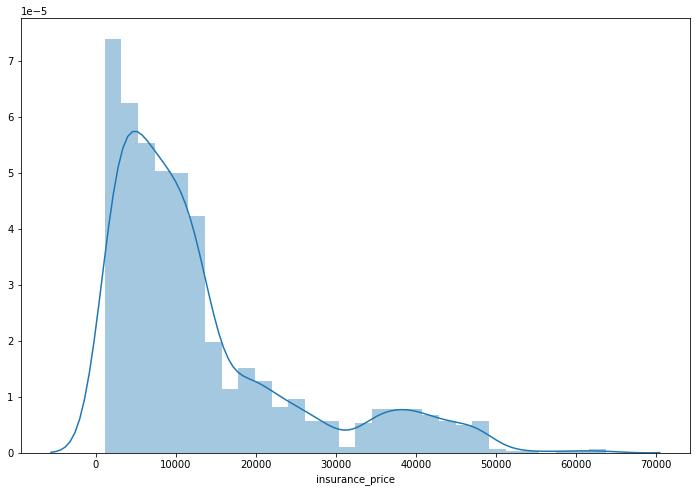

In [94]:
plt.figure(figsize=(12, 8))
sns.distplot(df['insurance_price'], bins = 30)

In [95]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='insurance_price'>

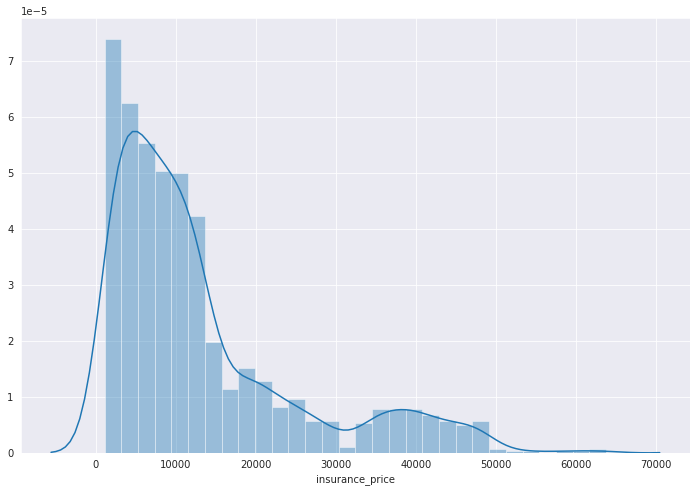

In [96]:
plt.figure(figsize=(12, 8))
sns.distplot(df['insurance_price'], bins = 30)

## Encoding

In [97]:
df

,age,gender,bmi,child,smoking,region,insurance_price,segments
0,19,female,27.9,0,yes,southwest,16884.92,smoking and normal
1,18,male,33.8,1,no,southeast,1725.55,standard
2,28,male,33.0,3,no,southeast,4449.46,standard
3,33,male,22.7,0,no,northwest,21984.47,standard
4,32,male,28.9,0,no,northwest,3866.86,standard
...,...,...,...,...,...,...,...,...
1330,50,male,31.0,3,no,northwest,10600.55,standard
1331,18,female,31.9,0,no,northeast,2205.98,standard
1332,18,female,36.9,0,no,southeast,1629.83,standard
1333,21,female,25.8,0,no,southwest,2007.95,standard


In [98]:
pd.get_dummies(df)

,age,bmi,child,insurance_price,gender_female,gender_male,smoking_no,smoking_yes,region_northeast,region_northwest,region_southeast,region_southwest,segments_smoking and normal,segments_smoking and obese,segments_standard
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1,1,0,0
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0,0,0,1
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0,0,0,1
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0,0,0,1
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,50,31.0,3,10600.55,0,1,1,0,0,1,0,0,0,0,1
1331,18,31.9,0,2205.98,1,0,1,0,1,0,0,0,0,0,1
1332,18,36.9,0,1629.83,1,0,1,0,0,0,1,0,0,0,1
1333,21,25.8,0,2007.95,1,0,1,0,0,0,0,1,0,0,1


In [99]:
pd.get_dummies(df, drop_first = True)

,age,bmi,child,insurance_price,gender_male,smoking_yes,region_northwest,region_southeast,region_southwest,segments_smoking and obese,segments_standard
0,19,27.9,0,16884.92,0,1,0,0,1,0,0
1,18,33.8,1,1725.55,1,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1330,50,31.0,3,10600.55,1,0,1,0,0,0,1
1331,18,31.9,0,2205.98,0,0,0,0,0,0,1
1332,18,36.9,0,1629.83,0,0,0,1,0,0,1
1333,21,25.8,0,2007.95,0,0,0,0,1,0,1


<AxesSubplot:>

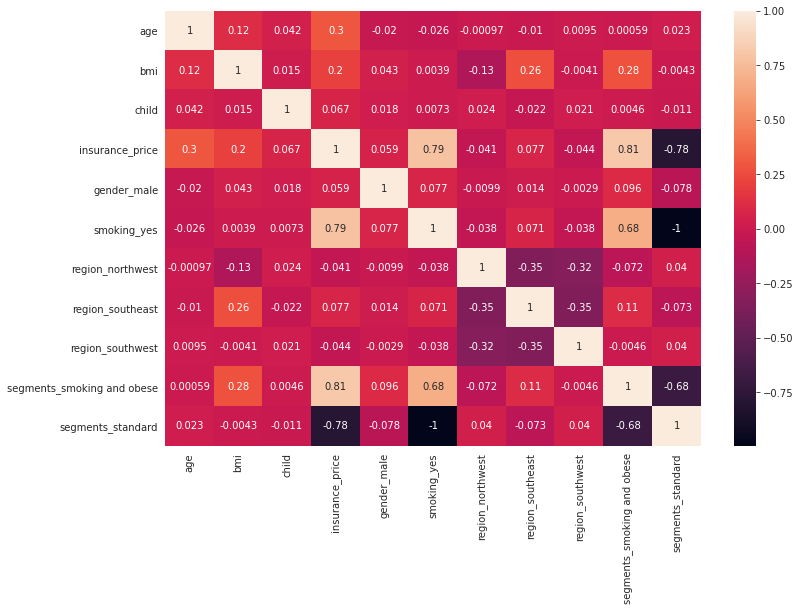

In [100]:
plt.figure(figsize = (12, 8))
sns.heatmap(pd.get_dummies(df, drop_first = True).corr(), annot = True)

<AxesSubplot:>

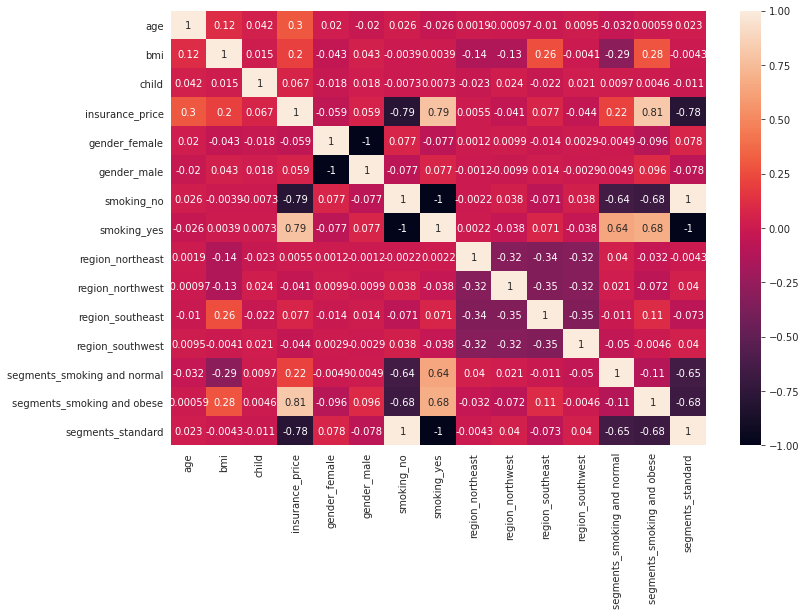

In [101]:
plt.figure(figsize = (12, 8))
sns.heatmap(pd.get_dummies(df).corr(), annot = True)

In [102]:
df = pd.get_dummies(df, drop_first = True)

In [103]:
df

,age,bmi,child,insurance_price,gender_male,smoking_yes,region_northwest,region_southeast,region_southwest,segments_smoking and obese,segments_standard
0,19,27.9,0,16884.92,0,1,0,0,1,0,0
1,18,33.8,1,1725.55,1,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1330,50,31.0,3,10600.55,1,0,1,0,0,0,1
1331,18,31.9,0,2205.98,0,0,0,0,0,0,1
1332,18,36.9,0,1629.83,0,0,0,1,0,0,1
1333,21,25.8,0,2007.95,0,0,0,0,1,0,1


<AxesSubplot:xlabel='smoking_yes', ylabel='insurance_price'>

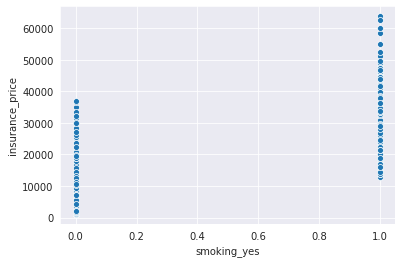

In [104]:
sns.scatterplot('smoking_yes', 'insurance_price', data = df)

<AxesSubplot:xlabel='smoking_yes', ylabel='insurance_price'>

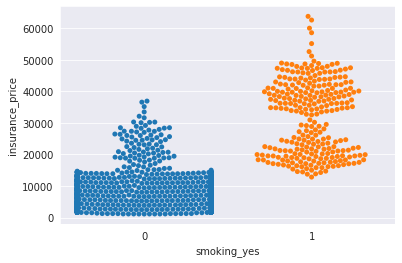

In [105]:
sns.swarmplot('smoking_yes', 'insurance_price', data = df)

<AxesSubplot:xlabel='smoking_yes', ylabel='insurance_price'>

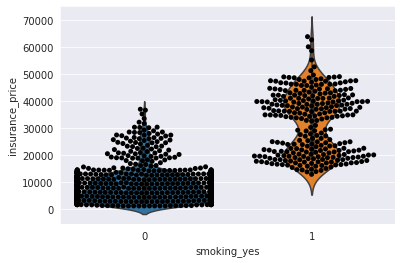

In [106]:
sns.violinplot('smoking_yes', 'insurance_price', data = df)
sns.swarmplot('smoking_yes', 'insurance_price', data = df, color = 'black')

In [107]:
X = df.drop('insurance_price', axis = 1)

In [108]:
y = df['insurance_price']

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
model = LinearRegression()

In [113]:
model.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred = model.predict(X_test)

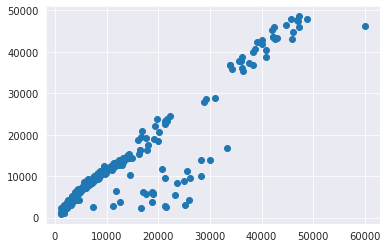

In [115]:
plt.scatter(y_test, y_pred)

In [116]:
from sklearn import metrics

In [117]:
metrics.mean_absolute_error(y_test, y_pred)

2655.2374776037486